## Histogram of an Image:
A histogram of an image divides the pixels into discrete bins by their values, counts the number of pixels that fall in each bin, and then visualizes the results in an intuitive manner.

We will create histograms of an image's grayscale and colored versions with both Numpy and Matplotlib's PyPlot module. Both libraries provide histograms for datasets, only difference is Numpy outputs numerical representation of the dataset, whereas PyPlot outputs the graphical representation.

Let's use Numpy to output the histogram of a grayscale image of an orange:

Text(0.5, 1.0, 'Grayscale Image')

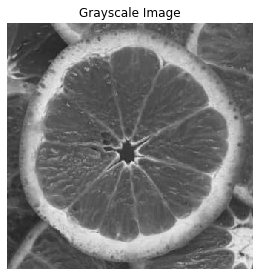

In [1]:
#import necessary libraries
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Load the image into the workspace
gray_orange = skimage.io.imread('orange.jpg', as_gray=True)
#display the image
skimage.io.imshow(gray_orange)
plt.axis('off')
plt.title('Grayscale Image')

In [2]:
#Create the histogram using Numpy and print the result:
histogram_gray, bin_edges_gray = np.histogram(gray_orange, bins=256, range=(0, 1))
histogram_gray

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    1,    0,    1,    0,    5,
          2,    4,    5,   12,   13,   22,   31,   45,   64,  112,  176,
        179,  236,  212,  201,  183,  215,  207,  288,  279,  353,  366,
        380,  391,  428,  426,  489,  499,  513,  481,  475,  496,  443,
        479,  500,  512,  536,  616,  686,  750,  908, 1060, 1332, 1437,
       1705, 1909, 2031, 2132, 2303, 2358, 2392, 2304, 2336, 2387, 2276,
       2355, 2124, 1937, 1913, 1838, 1770, 1658, 1562, 1449, 1467, 1336,
       1296, 1229, 1121, 1055, 1043,  974,  975,  904,  861,  860,  808,
        756,  743,  737,  706,  701,  664,  641,  593,  549,  552,  503,
        542,  483,  504,  396,  422,  399,  353,  388,  386,  336,  325,
        335,  312,  330,  307,  302,  262,  247,  287,  273,  251,  301,
        277,  265,  263,  251,  258,  275,  249,  2

Outputting numbers does not help us much. Let's visualize these numbers by using PyPlot:

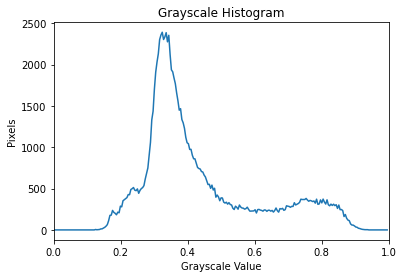

In [10]:
plt.title('Grayscale Histogram')
plt.xlabel('Grayscale Value')
plt.ylabel('Pixels')
plt.xlim([0.0, 1.0])
plt.plot(bin_edges_gray[0:-1], histogram_gray)
plt.show()


We can also plot the image's histogram directly without needing Numpy. Let's draw the histogram of the image by flattening the image matrix. Flattening means we form an array by adding all pixel values one after another.  

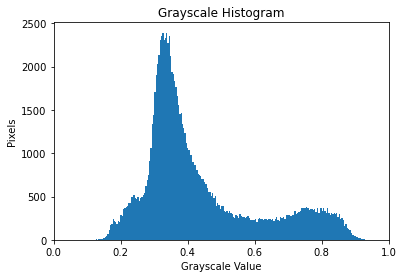

In [4]:
#Grayscale image's histogram drawn using PyPlot:
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Grayscale Value')
plt.ylabel('Pixels')
plt.xlim([0.0, 1.0])
plt.hist(gray_orange.flatten(), bins=256, range=(0,1))
plt.show()

Color-wise, this is a relatively uniform image except the white parts around the orange slices. Meaning, the majority of the pixels' color values is around the same gray tone. So it makes sense that we have a peak around the value of 0.35. White parts account for the little peak around the value of 0.8.

Now let's load the colored version of the same image, create it's histogram by using Numpy and draw it with PyPlot like before:

Text(0.5, 1.0, 'Colored Image')

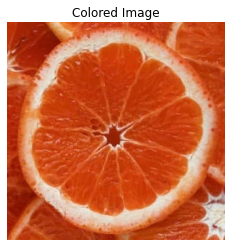

In [5]:
colored_orange = skimage.io.imread('orange.jpg')
plt.imshow(colored_orange)
plt.axis('off')
plt.title('Colored Image')

Create the histogram by using Numpy.

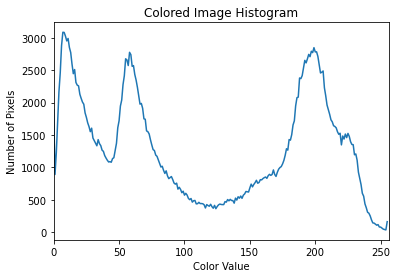

In [6]:
#Create histogram using Numpy
histogram_colored, bin_edges_colored = np.histogram(colored_orange, bins=256, range=(0,256))
#Plot the histogram
plt.figure()
plt.title('Colored Image Histogram')
plt.xlabel('Color Value')
plt.ylabel('Number of Pixels')
plt.xlim([0.0, 256.0])
plt.plot(bin_edges_colored[0:-1], histogram_colored)
plt.show()

Let's create the histogram by using PyPlot this time:

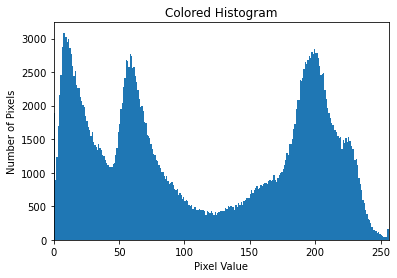

In [7]:
#Colored image's histogram created and drawn by PyPlot
plt.figure()
plt.title('Colored Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixels')
plt.xlim([0.0, 256.0])
plt.hist(colored_orange.flatten(), bins=256, range=(0, 256))
plt.show()

Each pixel's color is determined by a combination of three colors; red, green and blue. Creating one histogram for a colored image does not show us a clear picture of each color's contributions. In the following section, we will draw each color channels' histograms separately. For now, we will try to draw some conclusions by looking at the image and the histogram, and see if they will hold true later.

Orange is a combination of red and green colors. If you need assitance visualizing this, you can go to [this](https://www.rapidtables.com/web/color/RGB_Color.html) website and adjust values of red, green and blue values to 255, 100 and 0 respectively to obtain an orange color. Since orange is the dominant color of this image, we could predict the peak that falls on the higher intensity part (around 200) of the spectrum to be of the red color as the red color seems to be the most dominant one in the image. The middle peak that forms around the value of 60 could be green and the first one from the left could be blue as it has the least amount of contribution to the image. 

So, let's draw each channel's histogram separately on the same plot to see if we are right:

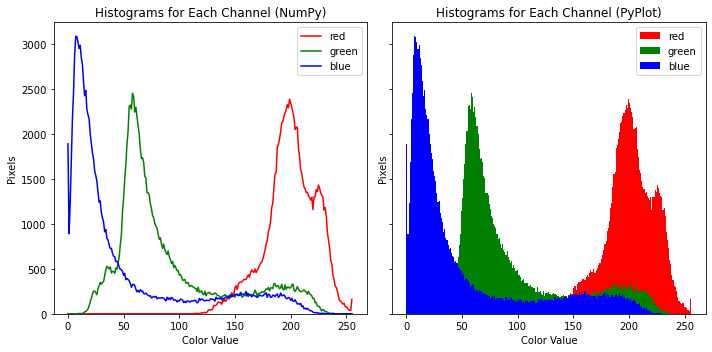

In [8]:
#Creating a histogram for each channel in a colored image
#by using both Numpy and PyPlot libraries for comparison purposes:
fig, (ax1, ax2) =plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)
ax1.set_title('Histograms for Each Channel (NumPy)')
ax1.set_xlabel('Color Value')
ax1.set_ylabel('Pixels')
ax2.set_title('Histograms for Each Channel (PyPlot)')
ax2.set_xlabel('Color Value')
ax2.set_ylabel('Pixels')
plt.tight_layout()

colors = ['red','green','blue']
channels = [0,1,2]
#Go through colors and channels lists and plot an histogram for each channel
for channel, color in zip(channels, colors):
    histogram, bin_edges = np.histogram(colored_orange[:,:,channel], bins=256, range=(0,256))
    ax1.plot(bin_edges[0:-1], histogram, c=color)
    ax1.legend(colors)
    ax2.hist(colored_orange[:,:,channel].flatten(), bins=256, range=(0, 256), color=color)
    ax2.legend(colors)
plt.tight_layout()


The histograms indicate that our predictions for each channels' contribution to the image are indeed correct. 

Although histograms are great tools to depict a picture of how frequently values occur in a dataset, they come with some drawbacks. Choosing a sensible bin size is an important one. A data point falling in a bin is counted as one unit. If the bin size happens to be too big, then we would not have a totally accurate representation of the data points, since smaller and larger data points in a big range falling into the same bin are all counted as one unit. To alleviate this problem, we could choose as small bins as possible but the trade off would be sacrificing the computational power.

Another way would be using Kernel Density Estimation (KDE). In KDE, we apply a kernel function to each data point. Here, we will use the Gaussian function.  The Gaussian function has the highest value at where the data point is, then goes down as we move to the left or right of that data point. Then, as we add up all Gaussian functions for all data points, we have a graph of the dataset that gives more weigh to the location (value) of each data point. Hence, the end result is much more representative of the actual dataset than a histogram. This <a href=https://en.wikipedia.org/wiki/Kernel_density_estimation#/media/File:Comparison_of_1D_histogram_and_KDE.png> image </a> provides a good visual representation: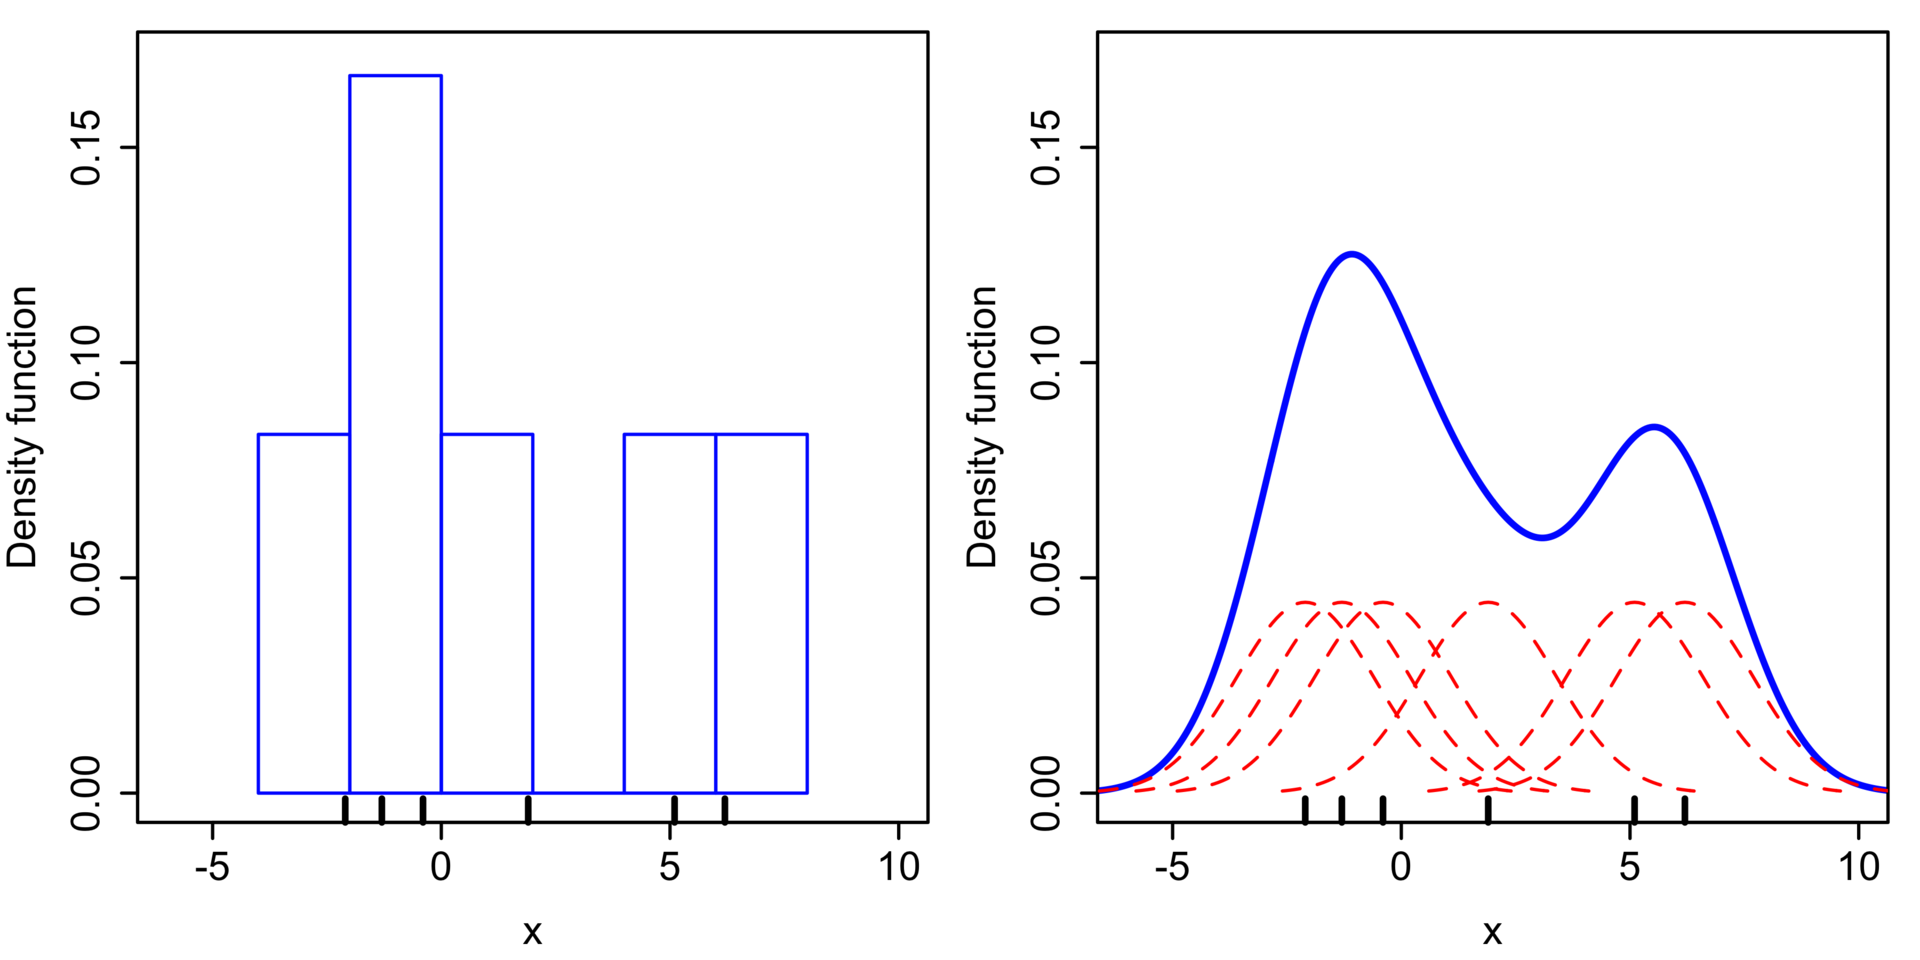

In the following, we will write a function that plots KDE of a given color channel dataset. Then we will write another function to employ our KDE function for each channel of a given image. Finally, we will see if our functions work properly by applying them to our colored orange image. We should get something similar to the histograms of the orange image above:

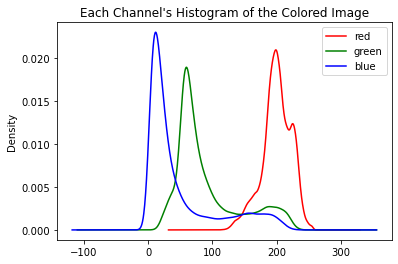

In [9]:
#Apply kde to a dataset (color channel of an image)

def plot_kde(channel, color):
    '''
        This function flattens pixel values of a given channel,
        and draws its KDE plot. The plot color is determined by 
        the input 'color'.
        
    '''
    data=channel.flatten()
    return pd.Series(data).plot.density(c=color)
channels=['r','g','b']
def plot_rgb(image_data):
    '''
        This function applies plot_kde function to
        each channel of a given colored image.
    '''
    for i, color in enumerate(channels):
        plot_kde(image_data[:,:,i], color)
    plt.legend(['red','green','blue'])
    plt.title('Each Channel\'s KDE of the Colored Image')
    plt.show()
plot_rgb(colored_orange)


In this part of the tutorial, we explored different ways of plotting an image's histogram. We observed that histograms are great tools to discern the contributions of each color to the image. We went one step further and explored KDE functions for a more accurate representation of each channel's contribution.  